In [1]:
import cv2
import numpy as np
import skimage.io as si
import skimage.color as sc
import skimage.transform as st
import matplotlib.pyplot as plt

## 1. Using `OpenCV` and `skimage.transform`
- In two dimensions, to carry out a rotation using a matrix, the point (x, y) to be rotated counterclockwise is written as a column vector, then multiplied by a rotation matrix calculated from the angle $\theta$ 

$${\begin{bmatrix}x'\\y'\end{bmatrix}}={\begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \end{bmatrix}}{\begin{bmatrix}x\\y\end{bmatrix}}.$$

or

$$ (x_r, y_r) = \left( x \cos \theta - y \sin \theta, x \cos \theta + y \sin \theta \right) $$

- In `Python` we can use both `cv2.getRotationMatrix2D` then `cv2.wrapAffine` in **`OpenCV`** and also `skimage.transform.rotate` to implement. 

- The `transformation matrix` of the form

$$ M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta   \end{bmatrix}$$

But `OpenCV` provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

$$ \begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ - \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y \end{bmatrix} $$

where:

$$ \begin{array}{l} \alpha =  scale \cdot \cos \theta , \\ \beta =  scale \cdot \sin \theta \end{array} $$

### 1.1. Comparision.

Checking pointwise-equality of 2 rotated-images:  False


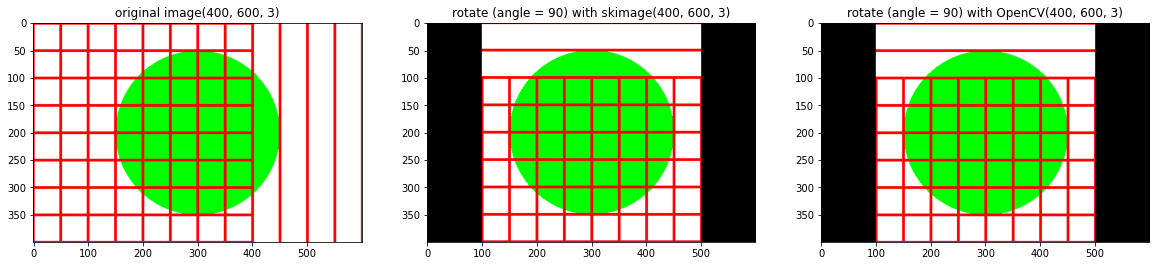

In [2]:
## create the image
black = np.zeros((400, 600, 3), dtype = np.uint8)
img = black.copy()
img[:,:,0] = 255
img[:,:,1] = 255
img[:,:,2] = 255
img = cv2.circle(img, (300, 200), 150, (0, 255, 0), -1)
for j in range(0, 401, 50):
    for k in range(0, 601, 50):
        img = cv2.line(img, (k, 0), (k,600), (255, 0, 0), 3)
        img = cv2.line(img, (400-k, 0), (400-k, 600), (255, 0, 0), 3)
        img = cv2.line(img, (0, 600-j), (400, 600-j), (255, 0, 0), 3)
        img = cv2.line(img, (0, j), (400, j), (255, 0, 0), 3)

## using skimage.transform
img_rot_st = st.rotate(img, 90)
## using OpenCV
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
img_rot_cv = cv2.warpAffine(img, M, (cols,rows))

## display
images = [img, img_rot_st, img_rot_cv]
titles = ['original image', 'rotate (angle = 90) with skimage', 'rotate (angle = 90) with OpenCV']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 6))
ax = axes.ravel()
for k in range(3):
    ax[k].imshow(images[k])
    ax[k].set_title(titles[k] + str(images[k].shape))
    
print('Checking pointwise-equality of 2 rotated-images: ',(img_rot_cv == img_rot_st).all())

### 1.2. In `OpenCV`
Now, look at the following illustrations, to create the `rotation-matrix`, we will fix :
- the `center` of transformation be the `corners` and the `centers` of image.
- the `angle` will be `0` (without rotation or the original image), `30, 45, 60, 90, 180`

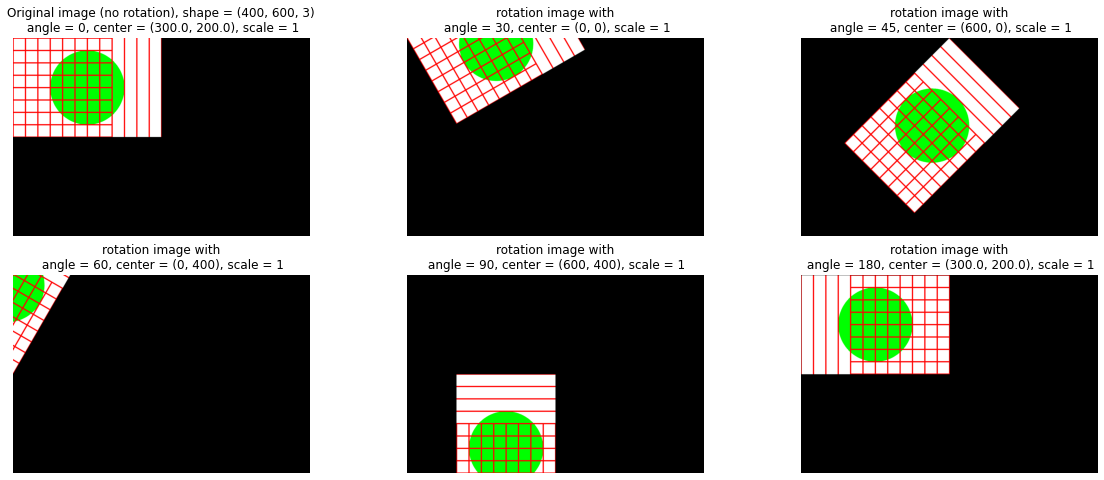

In [3]:
rows, cols = img.shape[:2]
centers = [(cols/2,rows/2), (0, 0), (cols,0), (0,rows), (cols,rows), (cols/2,rows/2)]
angles = [0, 30, 45, 60, 90, 180]
titles = ['Original image (no rotation), shape = '+str(img.shape), 'rotation image with', 'rotation image with', 
          'rotation image with', 'rotation image with', 'rotation image with']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20, 8))
ax = axes.ravel()
for k in range(6):
    M = cv2.getRotationMatrix2D(centers[k], angles[k], 1)
    img_rot_cv = cv2.warpAffine(img, M, (2*cols, 2*rows))
    ax[k].imshow(img_rot_cv)
    ax[k].set_title(titles[k] + '\n angle = %s, center = %s, scale = 1'%(angles[k], centers[k]))
    ax[k].set_axis_off()

### 1.3. Using `skimage.transform`

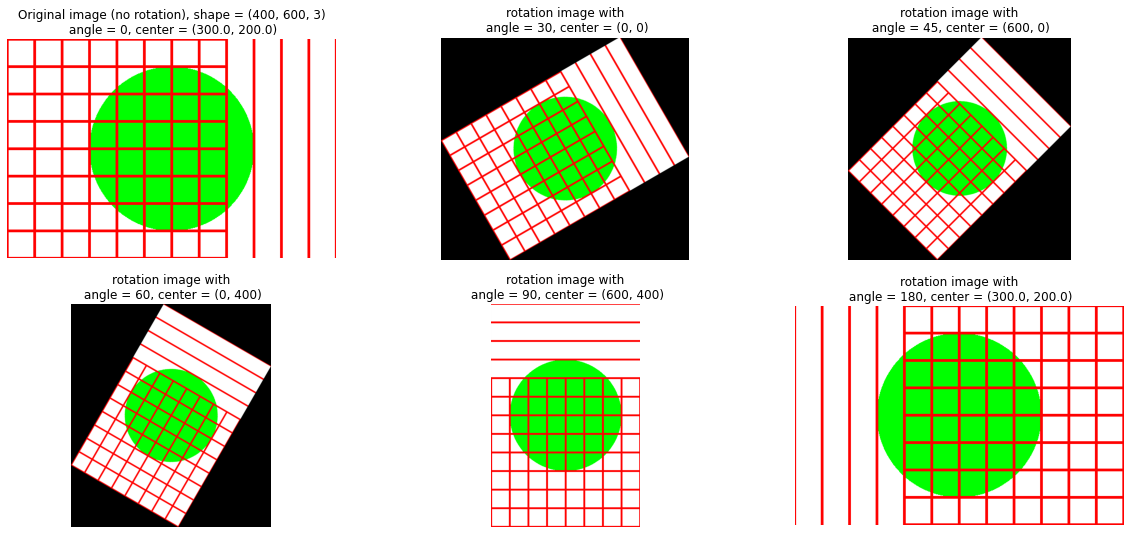

In [4]:
rows, cols = img.shape[:2]
centers = [(cols/2,rows/2), (0, 0), (cols,0), (0,rows), (cols,rows), (cols/2,rows/2)]
angles = [0, 30, 45, 60, 90, 180]
titles = ['Original image (no rotation), shape = '+str(img.shape), 'rotation image with', 'rotation image with', 
          'rotation image with', 'rotation image with', 'rotation image with']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20, 9))
ax = axes.ravel()
for k in range(6):
    img_rot_st = st.rotate(img, angle = angles[k], center = centers[k], resize = (2*cols, 2*rows))
    ax[k].imshow(img_rot_st)
    ax[k].set_title(titles[k] + '\n angle = %s, center = %s'%(angles[k], centers[k]))
    ax[k].set_axis_off()

## 2. EXERCISE
#### Exercise 1. Rotate arround the bottom_right-corner

You can use the `img` which created in the opening example.

In this exercise, you are asked to rotate the `img` satisfies the following constraints:
- The angles is in the list `[0, 30, 45, 60, 90, 120, 135, 150, 180]`
- The center is the `bottom-right-corner` of the `img`, which be `(cols, rows)` where

                        rows, cols = img.shape[: 2]
- The total 9 images is set into a frame of 3 rows and 3 columns.
- Finally, you must create the `rotation matrix` by using `cv2.getRotationMatrix2D` from `OpenCV`,

                cv2.getRotationMatrix2D(center_of_rotation, angle_of_rotation, scale_of_rotation)
                
**SOLUTION.**                

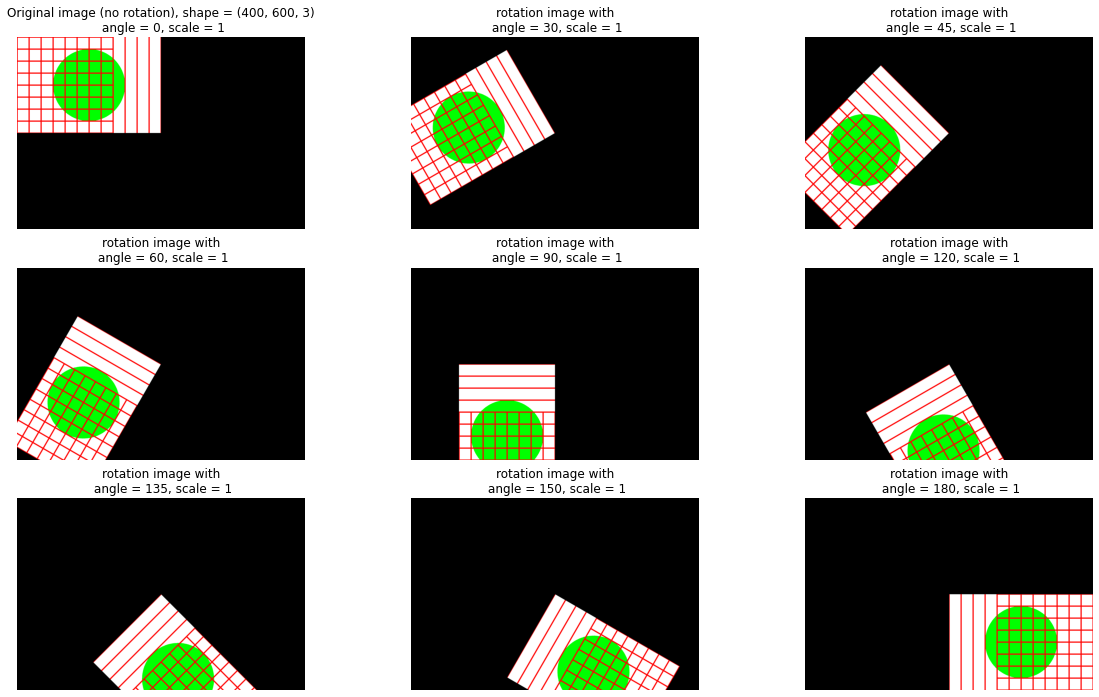

In [5]:
rows, cols = img.shape[:2]
angles = [0, 30, 45, 60, 90, 120, 135, 150, 180]
titles = ['Original image (no rotation), shape = '+str(img.shape), 'rotation image with', 'rotation image with', 
          'rotation image with', 'rotation image with', 'rotation image with',
          'rotation image with', 'rotation image with', 'rotation image with',]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (20, 12))
ax = axes.ravel()
for k in range(9):
    M = cv2.getRotationMatrix2D((cols, rows), angles[k], 1)
    img_rot_cv = cv2.warpAffine(img, M, (2*cols, 2*rows))
    ax[k].imshow(img_rot_cv)
    ax[k].set_title(titles[k] + '\n angle = %s, scale = 1'%(angles[k]))
    ax[k].set_axis_off()

#### Exercise 2. Do the samething as in Exercise 2.1 but you are asked to using `skimage.transform`.

**SOLUTION.**

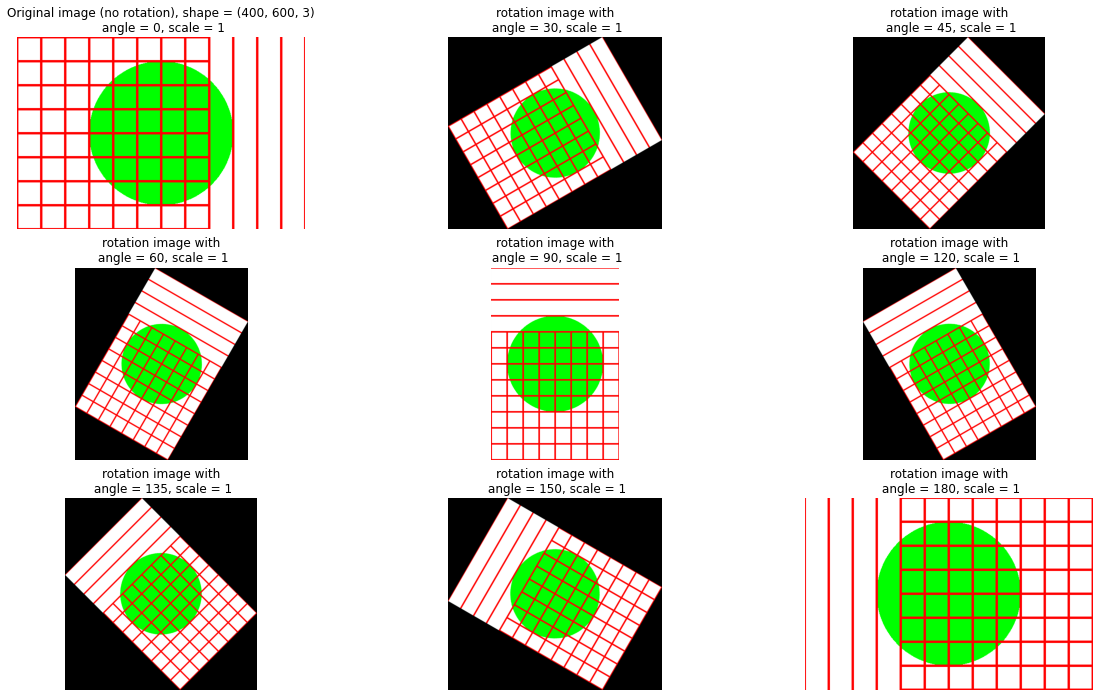

In [6]:
rows, cols = img.shape[:2]
angles = [0, 30, 45, 60, 90, 120, 135, 150, 180]
titles = ['Original image (no rotation), shape = '+str(img.shape), 'rotation image with', 'rotation image with', 
          'rotation image with', 'rotation image with', 'rotation image with',
          'rotation image with', 'rotation image with', 'rotation image with',]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (20, 12))
ax = axes.ravel()
for k in range(9):
    img_rot_st = st.rotate(img, resize = (2*cols, 2*rows), angle = angles[k], center = (cols, rows))
    ax[k].imshow(img_rot_st)
    ax[k].set_title(titles[k] + '\n angle = %s, scale = 1'%(angles[k]))
    ax[k].set_axis_off()

#### Exercise 3. Rotate the center of image with many different size with a fixed angle.
In this exercise, you are asked to display 9 images into 3 rows, where:
- The 1st rows with angle = 0, center = center_of_image, size = {1, 2, 3} respectively left to right.
- The 2nd rows with angle = 45, center = center_of_image, size = {1, 2, 3} respectively left to right.
- The 3rd rows with angle = 90, center = center_of_image, size = {1, 2, 3} respectively left to right.

You can use the `img` which created in the opening example.

**SOLUTION.**

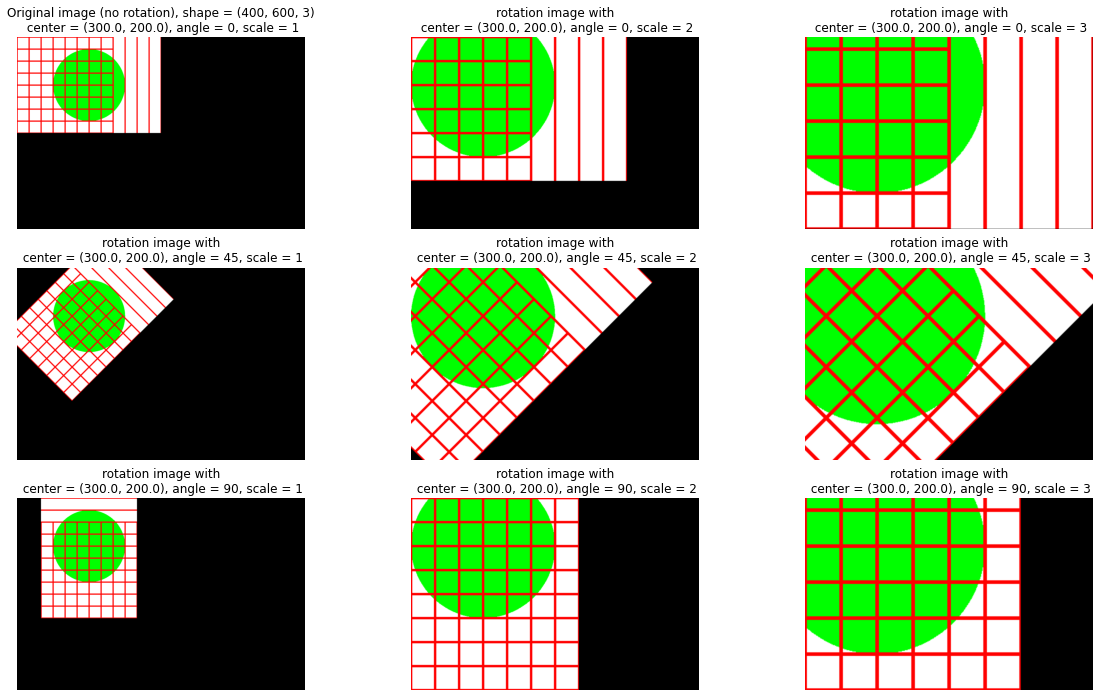

In [7]:
rows, cols = img.shape[:2]
titles = ['Original image (no rotation), shape = '+str(img.shape), 'rotation image with', 'rotation image with', 
          'rotation image with', 'rotation image with', 'rotation image with',
          'rotation image with', 'rotation image with', 'rotation image with',]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (20, 12))
ax = axes.ravel()
for k in range(9):
    scale_k = ((k+1)%3)*(k%3!=2) + 3*(k%3 == 2)
    angle_k = (k // 3)*45
    center = (cols/2, rows/2)
    M = cv2.getRotationMatrix2D(center, angle_k, scale_k)
    img_rot_cv = cv2.warpAffine(img, M, (2*cols, 2*rows))
    ax[k].imshow(img_rot_cv)
    ax[k].set_title(titles[k] + '\n center = %s, angle = %s, scale = %s'%(center, angle_k, scale_k))
    ax[k].set_axis_off()

#### Exercise 4. `Translation` is inside the `Rotation`.
In this exercise, you are asked to create :
- the `rectangle` size `600 x 400` with `grid_cell = (100, 100)`, 
- an `ellipse` with `axes = (150, 75)` with in the rectangle.
- There are total 9 images, 3 rows. From left to right,

$\qquad$ The `center of rotation` is the center of rectangle, which be `(300, 200)`

$\qquad$ The `angle` is `0, 135, 180` respectively

$\qquad$ The `ellipse` is supposed to move on the diagonal of the rectangle, centered at `(150, 100) (original)`, `(300, 200)` and `(450, 300)`

- From top to bottom, the `scale` is `1, 2, 3` respectively.

**Step 1.** Plot the rectangle.

**SOLUTION.**

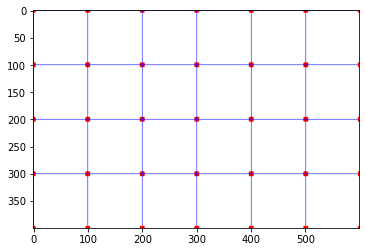

In [8]:
rect = np.zeros((400, 600, 3), dtype = np.uint8)
rect[:,:,0] = 255
rect[:,:,1] = 255
rect[:,:,2] = 255
for r in range(0, 401, 100):
    for c in range(0, 601, 100):
        cv2.line(rect, (c, 0), (c, 400), (0, 0, 255), 1)
        cv2.line(rect, (0, r), (600, r), (0, 0, 255), 1)
        cv2.circle(rect, (c, r), 5, (255,0, 0), -1)
plt.imshow(rect)

**Step 2.** Create the rotation of images. Noting that,
- There are total 9 images, 3 rows. From left to right,

$\qquad$ The `center of rotation` is the center of rectangle, which be `(200, 300)`

$\qquad$ The `angle` is `0, 135, 180` respectively

- From top to bottom, the `scale` is `1, 2, 3` respectively.

**SOLUTION.**

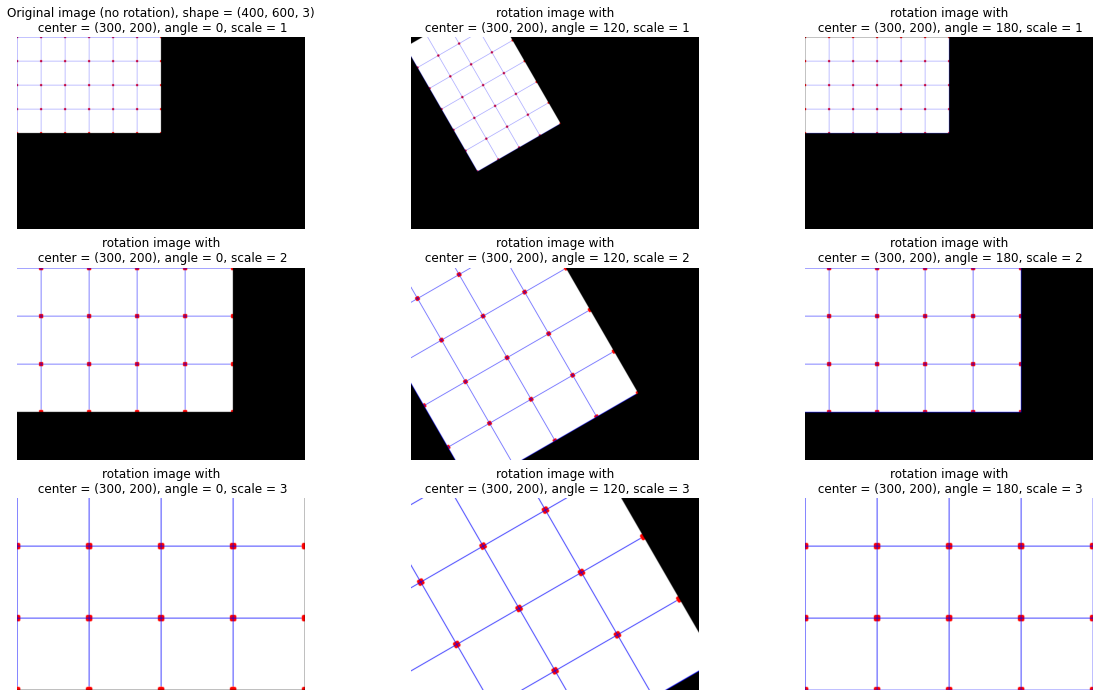

In [9]:
rows, cols = rect.shape[:2]
titles = ['Original image (no rotation), shape = '+str(img.shape), 'rotation image with', 'rotation image with', 
          'rotation image with', 'rotation image with', 'rotation image with',
          'rotation image with', 'rotation image with', 'rotation image with',]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (20, 12))
ax = axes.ravel()
for k in range(9):
    scale_k = [1, 2, 3][k // 3]
    angle_k = [0, 120, 180][k % 3]
    center = (300, 200)
    M = cv2.getRotationMatrix2D(center, angle_k, scale_k)
    img_rot_cv = cv2.warpAffine(rect, M, (2*cols, 2*rows))
    ax[k].imshow(img_rot_cv)
    ax[k].set_title(titles[k] + '\n center = %s, angle = %s, scale = %s'%(center, angle_k, scale_k))
    ax[k].set_axis_off()

**Step 3.** Plug the `movement of ellipse` for each rotation.

**SOLUTION.**

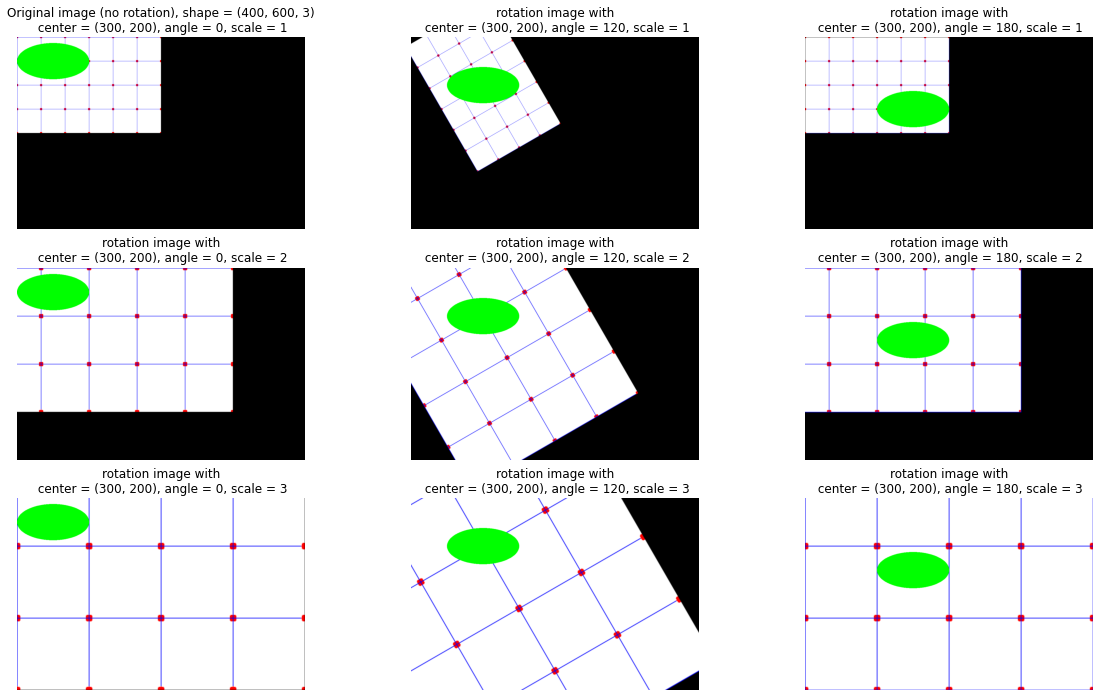

In [10]:
rows, cols = rect.shape[:2]
titles = ['Original image (no rotation), shape = '+str(img.shape), 'rotation image with', 'rotation image with', 
          'rotation image with', 'rotation image with', 'rotation image with',
          'rotation image with', 'rotation image with', 'rotation image with',]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (20, 12))
ax = axes.ravel()
for k in range(9):
    Rect = rect.copy()
    scale_k = [1, 2, 3][k // 3]
    angle_k = [0, 120, 180][k % 3]
    center = (300, 200)
    ell_cen = [(150, 100), (300, 200), (450, 300)][k%3]
    M = cv2.getRotationMatrix2D(center, angle_k, scale_k)
    img_rot_cv = cv2.warpAffine(Rect, M, (2*cols, 2*rows))
    output = cv2.ellipse(img_rot_cv, ell_cen, (150, 75), 0, 0, 360, (0, 255, 0), -1)
    ax[k].imshow(output)
    ax[k].set_title(titles[k] + '\n center = %s, angle = %s, scale = %s'%(center, angle_k, scale_k))
    ax[k].set_axis_off()